In [1]:
#importing pandas and numpy
import pandas as pd
import numpy as np
from sklearn import preprocessing
pd.set_option('display.max_columns',None) #this sets the columns to max and displays all columns

In [2]:
#reading data
train=pd.read_csv('train_ver2.csv',low_memory=False,index_col=False)
test=pd.read_csv('test_ver2.csv',low_memory=False,index_col=False)

In [3]:
train.sample(5)

,fecha_dato,ncodpers,ind_empleado,pais_residencia,sexo,age,fecha_alta,ind_nuevo,antiguedad,indrel,ult_fec_cli_1t,indrel_1mes,tiprel_1mes,indresi,indext,conyuemp,canal_entrada,indfall,tipodom,cod_prov,nomprov,ind_actividad_cliente,renta,segmento,ind_ahor_fin_ult1,ind_aval_fin_ult1,ind_cco_fin_ult1,ind_cder_fin_ult1,ind_cno_fin_ult1,ind_ctju_fin_ult1,ind_ctma_fin_ult1,ind_ctop_fin_ult1,ind_ctpp_fin_ult1,ind_deco_fin_ult1,ind_deme_fin_ult1,ind_dela_fin_ult1,ind_ecue_fin_ult1,ind_fond_fin_ult1,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
1155971,2015-02-28,950497,N,ES,V,27,2011-09-28,0.0,46,1.0,NaN,1.0,I,S,N,NaN,KHE,N,1.0,9.0,BURGOS,1.0,99789.36,03 - UNIVERSITARIO,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
10053206,2016-02-28,1290446,N,ES,H,21,2014-08-04,0.0,18,1.0,NaN,1,A,S,N,NaN,KHE,N,1.0,17.0,GIRONA,1.0,144989.61,03 - UNIVERSITARIO,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
6201152,2015-09-28,1117490,N,ES,V,24,2013-01-10,0.0,32,1.0,NaN,1.0,I,S,N,NaN,KHE,N,1.0,45.0,TOLEDO,0.0,35336.43,03 - UNIVERSITARIO,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
4516550,2015-07-28,1228775,N,ES,V,34,2013-12-04,0.0,19,1.0,NaN,1.0,A,S,N,NaN,KFC,N,1.0,46.0,VALENCIA,1.0,64514.43,02 - PARTICULARES,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,1.0,0
2681974,2015-05-28,1319355,N,ES,V,21,2014-09-29,0.0,10,1.0,NaN,1.0,I,S,N,NaN,KHE,N,1.0,33.0,ASTURIAS,0.0,58255.41,03 - UNIVERSITARIO,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0


In [4]:
train.ult_fec_cli_1t.value_counts(dropna=False)

NaN           13622516
2015-12-24         763
2015-12-28         521
2015-07-09         443
2015-07-06         405
                ...   
2016-04-28          44
2015-08-19          44
2015-08-06          41
2016-01-04          34
2015-12-23          27
Name: ult_fec_cli_1t, Length: 224, dtype: int64

In [5]:
train.conyuemp.value_counts(dropna=False)

NaN    13645501
N          1791
S            17
Name: conyuemp, dtype: int64

In [6]:
#checking all unique data for all columns of products
for prod in (train.iloc[:,24:]).columns:
    print(f"{prod} : {len(train[prod].unique())}")

ind_ahor_fin_ult1 : 2
ind_aval_fin_ult1 : 2
ind_cco_fin_ult1 : 2
ind_cder_fin_ult1 : 2
ind_cno_fin_ult1 : 2
ind_ctju_fin_ult1 : 2
ind_ctma_fin_ult1 : 2
ind_ctop_fin_ult1 : 2
ind_ctpp_fin_ult1 : 2
ind_deco_fin_ult1 : 2
ind_deme_fin_ult1 : 2
ind_dela_fin_ult1 : 2
ind_ecue_fin_ult1 : 2
ind_fond_fin_ult1 : 2
ind_hip_fin_ult1 : 2
ind_plan_fin_ult1 : 2
ind_pres_fin_ult1 : 2
ind_reca_fin_ult1 : 2
ind_tjcr_fin_ult1 : 2
ind_valo_fin_ult1 : 2
ind_viv_fin_ult1 : 2
ind_nomina_ult1 : 3
ind_nom_pens_ult1 : 3
ind_recibo_ult1 : 2


##### ind_nomina_ult1 and ind_nom_pens_ult1 having 3 types of values

In [7]:
train.ind_nomina_ult1.value_counts(dropna=False)

0.0    12885285
1.0      745961
NaN       16063
Name: ind_nomina_ult1, dtype: int64

In [8]:
train.ind_nom_pens_ult1.value_counts(dropna=False)

0.0    12821161
1.0      810085
NaN       16063
Name: ind_nom_pens_ult1, dtype: int64

##### They are having NaN values hence removing them

In [9]:
print(f"Number of unique user:{len(train.ncodpers.unique())}")
print(f"Number of users in raw data:{train.shape[0]}")

Number of unique user:956645
Number of users in raw data:13647309


##### Hence only keeping unique users among the whole data

In [10]:
train.dtypes

fecha_dato                object
ncodpers                   int64
ind_empleado              object
pais_residencia           object
sexo                      object
age                       object
fecha_alta                object
ind_nuevo                float64
antiguedad                object
indrel                   float64
ult_fec_cli_1t            object
indrel_1mes               object
tiprel_1mes               object
indresi                   object
indext                    object
conyuemp                  object
canal_entrada             object
indfall                   object
tipodom                  float64
cod_prov                 float64
nomprov                   object
ind_actividad_cliente    float64
renta                    float64
segmento                  object
ind_ahor_fin_ult1          int64
ind_aval_fin_ult1          int64
ind_cco_fin_ult1           int64
ind_cder_fin_ult1          int64
ind_cno_fin_ult1           int64
ind_ctju_fin_ult1          int64
ind_ctma_f

In [11]:
def preprocess_data_all(df):
    #detecting train and test data
    val=0
    if(df.shape[1]>24):
        val=1
    df=df.drop(columns=['ult_fec_cli_1t','conyuemp']) #dropping this two columns as they contain all NaN values
    #preprocessing for renta
    df['renta']=df['renta'].replace({"         NA":'0'})
    df['renta']=df['renta'].astype('float')
    df['renta']=df['renta'].replace({0:np.NaN})
    # Now removing all NaN values from the dataframet   
    df=df.dropna()
    #removing duplicate users
    df=df.drop_duplicates(subset=["ncodpers"],keep='last')
    #changing proper type of data for each column
    #here fecha_dato and fecha_alta are only having date hence setting them to date category
    df['fecha_dato']=pd.to_datetime(df['fecha_dato']) 
    df['fecha_alta']=pd.to_datetime(df['fecha_alta'])
    #Below are all numerical values changing them to proper numerical type
    df['age']=df['age'].astype('int')
    df['antiguedad']=df['antiguedad'].astype('int')
    #below columns are categorical data but they already having numeric value
    df['indrel']=df['indrel'].astype('int')
    df['ind_nuevo']=df['ind_nuevo'].astype('int')
    df['ind_actividad_cliente']=df['ind_actividad_cliente'].astype('int')
    if(val==1):
        df['ind_nomina_ult1']=df['ind_nomina_ult1'].astype('int')
        df['ind_nom_pens_ult1']=df['ind_nom_pens_ult1'].astype('int')
    df['indrel_1mes']=df['indrel_1mes'].replace({"1.0":"1","2.0":"2","3.0":"3","4.0":"4"})
    def label_encode_column(column_name:str):
        le=preprocessing.LabelEncoder() #creating label encoder object
        cat_names=list(df[column_name].unique()) #creating list of unique categorical values
        le.fit(cat_names) #fitting values into label encoder
        df[column_name]=le.transform(df[column_name]) #transforming and saving the data inside dataframe 

    #encoding the above columns using label_encoder function
    label_encode_column('sexo')
    label_encode_column('indfall')
    label_encode_column('indresi')
    label_encode_column('indext')
    #converting dates into yearmonthday format in numeric value like 2016-02-28 will be 20160228
    def converting_dates(column_name:str):
        dates=[]
        for time in df[column_name]:
            day=time.day #taking day
            month=int(time.month) #taking month
            year=int(time.year) #taking year
            if(month<10):
                year=year*10
            if(day<10):
                month=month*10
            val=int(str(f"{year}{month}{day}")) #creating value using day,month and year
            dates.append(val) 
        return dates
    #converting fecha_dato
    df.insert(loc=0,column="num_fecha_dato",value=converting_dates('fecha_dato'))
    #converting fecha_alta
    df.insert(loc=1,column="num_fecha_alta",value=converting_dates('fecha_alta'))
    #dropping fecha_dato and fecha_alta
    df.drop('fecha_dato',axis=1,inplace=True)
    df.drop('fecha_alta',axis=1,inplace=True)
    #for other categorical columns where category type is more than 2 we are using a special encoder where each category is represented by: 
    # (number of occurance of that category)/(total number of points)
    # source:https://medium.com/mlearning-ai/category-encoders-c2a9bb192f0a
    def encode_multicat(column_name):
        fe=df.groupby(column_name).size() #arraninging all groups with their frequency
        fe=fe/len(df) #dividing frequency by total number of points
        data=list(df[column_name].map(fe)) #converting and stroing all column data in to a list
        pos=df.columns.get_loc(column_name) #storing index of the column_name given
        df.insert(loc=pos,column=f"num_{column_name}",value=data) #inserting new encoded column data into that position
    #encoding ind_empleado
    encode_multicat('ind_empleado')
    df.drop('ind_empleado',axis=1,inplace=True) #dropping the old column with categorical data
    #encoding pais_residencia
    encode_multicat('pais_residencia')
    df.drop('pais_residencia',axis=1,inplace=True) #dropping the old column with categorical data
    #encoding indrel_1mes
    encode_multicat('indrel_1mes')
    df.drop('indrel_1mes',axis=1,inplace=True) #dropping the old column with categorical data
    #encoding tiprel_1mes
    encode_multicat('tiprel_1mes')
    df.drop('tiprel_1mes',axis=1,inplace=True) #dropping the old column with categorical data
    #encoding canal_entrada
    encode_multicat('canal_entrada')
    df.drop('canal_entrada',axis=1,inplace=True) #dropping the old column with categorical data
    #encoding segmento
    encode_multicat('segmento')
    df.drop('segmento',axis=1,inplace=True) #dropping the old column with categorical data
    #encoding nomprov
    encode_multicat('nomprov')
    df.drop('nomprov',axis=1,inplace=True) #dropping the old column with categorical data
    #changing all labels data into string
    if(val==1):
        for col_name in (df.loc[:,"ind_ahor_fin_ult1":]).columns:
            df[col_name]=df[col_name].astype(str)
        df['labels']=(df.iloc[:,22:]).values.sum(axis=1)
    clean_data=df.iloc[:,:22]
    if(val==1):
        clean_data.insert(len(clean_data.columns),"labels",df["labels"].values) 
    return clean_data

In [12]:
def preprocess_data(df):
    #detecting train and test data
    val=0
    if(df.shape[1]>24):
        val=1
    df=df.drop(columns=['ult_fec_cli_1t','conyuemp']) #dropping this two columns as they contain all NaN values
    #preprocessing for renta
    df['renta']=df['renta'].replace({"         NA":'0'})
    df['renta']=df['renta'].astype('float')
    df['renta']=df['renta'].replace({0:np.NaN})
    # Now removing all NaN values from the dataframet   
    df=df.dropna()
    #removing duplicate users
    df=df.drop_duplicates(subset=["ncodpers"],keep='last')
    #changing proper type of data for each column
    #here fecha_dato and fecha_alta are only having date hence setting them to date category
    df['fecha_dato']=pd.to_datetime(df['fecha_dato']) 
    df['fecha_alta']=pd.to_datetime(df['fecha_alta'])
    #Below are all numerical values changing them to proper numerical type
    df['age']=df['age'].astype('int')
    df['antiguedad']=df['antiguedad'].astype('int')
    #below columns are categorical data but they already having numeric value
    df['indrel']=df['indrel'].astype('int')
    df['ind_nuevo']=df['ind_nuevo'].astype('int')
    df['ind_actividad_cliente']=df['ind_actividad_cliente'].astype('int')
    if(val==1):
        df['ind_nomina_ult1']=df['ind_nomina_ult1'].astype('int')
        df['ind_nom_pens_ult1']=df['ind_nom_pens_ult1'].astype('int')
    df['indrel_1mes']=df['indrel_1mes'].replace({"1.0":"1","2.0":"2","3.0":"3","4.0":"4"})
    #changing all labels data into string
    if(val==1):
        for col_name in (df.loc[:,"ind_ahor_fin_ult1":]).columns:
            df[col_name]=df[col_name].astype(str)
        df['labels']=(df.iloc[:,22:]).values.sum(axis=1) #adding all labels into one data and making this problem a multiclass classification problem
    clean_data=df.iloc[:,:22]
    if(val==1):
        clean_data.insert(len(clean_data.columns),"labels",df["labels"].values) 
    return clean_data
    

In [13]:
prep_data=preprocess_data(train)
prep_data.sample(5)

,fecha_dato,ncodpers,ind_empleado,pais_residencia,sexo,age,fecha_alta,ind_nuevo,antiguedad,indrel,indrel_1mes,tiprel_1mes,indresi,indext,canal_entrada,indfall,tipodom,cod_prov,nomprov,ind_actividad_cliente,renta,segmento,labels
13363415,2016-05-28,1432870,N,ES,H,21,2015-08-10,0,9,1,1,I,S,N,KHQ,N,1.0,30.0,MURCIA,0,95553.00,03 - UNIVERSITARIO,001000000000000000000000
13602323,2016-05-28,1151266,N,ES,V,24,2013-07-30,0,34,1,1,I,S,N,KHE,N,1.0,41.0,SEVILLA,0,227069.28,03 - UNIVERSITARIO,001000000000000000000000
13451045,2016-05-28,1109744,N,ES,V,27,2012-12-05,0,41,1,1,I,S,N,KHE,N,1.0,28.0,MADRID,0,228335.34,03 - UNIVERSITARIO,001000000000000000000000
13475080,2016-05-28,992797,N,ES,H,63,2011-12-12,0,53,1,1,I,S,N,KHE,N,1.0,47.0,VALLADOLID,0,309392.46,02 - PARTICULARES,001000000000000000000000
13073145,2016-05-28,426200,N,ES,V,55,2003-07-04,0,155,1,1,I,S,N,KFD,N,1.0,28.0,MADRID,1,189349.38,02 - PARTICULARES,001000000000000000000000


In [14]:
prep_data=prep_data.loc[prep_data["labels"]!="000000000000000000000000"]
prep_data.shape

(532970, 23)

In [15]:
cleaned_train=preprocess_data_all(train)
cleaned_train.sample(5)

,num_fecha_dato,num_fecha_alta,ncodpers,num_ind_empleado,num_pais_residencia,sexo,age,ind_nuevo,antiguedad,indrel,num_indrel_1mes,num_tiprel_1mes,indresi,indext,num_canal_entrada,indfall,tipodom,cod_prov,num_nomprov,ind_actividad_cliente,renta,num_segmento,labels
12973077,20160528,20090426,159318,0.999334,0.999993,1,51,0,96,1,0.999999,0.572265,1,0,0.246921,0,1.0,28.0,0.359795,0,83690.37,0.606865,000000000000000000000000
13522285,20160528,20120612,1008976,0.999334,0.999993,0,49,0,50,1,0.999999,0.427733,1,0,0.246921,0,1.0,28.0,0.359795,1,53412.12,0.606865,000000000000000000100000
12773483,20160528,20070628,700043,0.999334,0.999993,1,69,0,23,1,0.999999,0.427733,1,0,0.246921,0,1.0,28.0,0.359795,1,181571.25,0.606865,001000000000000000000000
12925822,20160528,20100122,862255,0.999334,0.999993,0,32,0,21,1,0.999999,0.572265,1,0,0.246921,0,1.0,28.0,0.359795,0,86644.32,0.606865,000000000000000000000000
13616664,20160528,20130416,1128073,0.999334,0.999993,1,23,0,37,1,0.999999,0.572265,1,0,0.237417,0,1.0,12.0,0.006915,0,168298.86,0.606865,001000000000000000000000


In [16]:
cleaned_train=cleaned_train.loc[cleaned_train["labels"]!="000000000000000000000000"]
cleaned_train.shape

(532970, 23)

In [17]:
cleaned_train.labels.value_counts()[:10]

001000000000000000000000    280309
001000010000000000000000     33000
001000000000000000000001     20076
000000010000000000000000     19651
001000000000100000000000     10835
000000000000100000000000      6836
000001000000000000000000      6156
000010000000000000000111      5440
001000001000000000000000      5369
001000000001000000000000      4818
Name: labels, dtype: int64

In [18]:
#creating new column to store count of labels
def count_labels(df,labels:str):
    counts=df[labels].value_counts() #counts has a dict like structure
    values=[]
    for label in df.labels:
        values.append(counts[label])
    df["label_counts"]=values
    return df
#cleaned_train=count_labels(cleaned_train,"labels")
prep_data=count_labels(prep_data,"labels")

In [19]:
#only taking classes with frequency 4800 or more
final_prep_train=prep_data.loc[prep_data['label_counts']>4800]
#removing label_count as it is not required anymore
final_prep_train.drop('label_counts',axis=1,inplace=True)
final_prep_train.reset_index(inplace=True)
final_prep_train=final_prep_train.drop(['index'],axis=1)

C:\Users\avik4\AppData\Local\Temp\ipykernel_11144\2379198229.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_prep_train.drop('label_counts',axis=1,inplace=True)


In [20]:
#storing final train data
final_prep_train.to_pickle("prep_data.pkl")

In [21]:
prep_data2=count_labels(cleaned_train,"labels")

In [22]:
#only taking classes with frequency 4800 or more
final_train=cleaned_train.loc[cleaned_train['label_counts']>4800]
#removing label_count as it is not required anymore
final_train.drop('label_counts',axis=1,inplace=True)

C:\Users\avik4\AppData\Local\Temp\ipykernel_11144\2261089284.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_train.drop('label_counts',axis=1,inplace=True)


In [23]:
final_train.shape

(392490, 23)

In [24]:
final_train.reset_index(inplace=True)
final_train.head(5)

,index,num_fecha_dato,num_fecha_alta,ncodpers,num_ind_empleado,num_pais_residencia,sexo,age,ind_nuevo,antiguedad,indrel,num_indrel_1mes,num_tiprel_1mes,indresi,indext,num_canal_entrada,indfall,tipodom,cod_prov,num_nomprov,ind_actividad_cliente,renta,num_segmento,labels
0,5514550,20150928,20030314,411094,0.999334,0.999993,1,38,0,150,1,0.999999,0.427733,1,0,0.031966,0,1.0,28.0,0.359795,1,80362.29,0.606865,001000000000000000000001
1,5607286,20150928,20060610,620555,0.999334,0.999993,1,20,0,111,1,0.999999,0.427733,1,0,0.237417,0,1.0,28.0,0.359795,1,230417.22,0.351804,000000000000100000000000
2,5884365,20150928,20131014,1199129,0.999334,0.999993,0,23,0,23,1,0.999999,0.572265,1,0,0.293058,0,1.0,28.0,0.359795,0,297223.08,0.351804,001000000000000000000000
3,6031477,20150928,20120725,1030749,0.999334,0.999993,0,38,0,38,1,0.999999,0.427733,1,0,0.293058,0,1.0,50.0,0.026843,1,132736.02,0.606865,001000000000000000000000
4,6093146,20150928,20111004,954138,0.999334,0.999993,0,24,0,47,1,0.999999,0.572265,1,0,0.293058,0,1.0,29.0,0.025894,0,68997.60,0.351804,001000000000000000000000


In [25]:
#storing final train data
final_train.to_pickle("final_train.pkl")

In [26]:
#loading data using pkl
import pandas as pd
final_train=pd.read_pickle("final_train.pkl")

In [27]:
final_train.sample(2)

,index,num_fecha_dato,num_fecha_alta,ncodpers,num_ind_empleado,num_pais_residencia,sexo,age,ind_nuevo,antiguedad,indrel,num_indrel_1mes,num_tiprel_1mes,indresi,indext,num_canal_entrada,indfall,tipodom,cod_prov,num_nomprov,ind_actividad_cliente,renta,num_segmento,labels
84988,12919640,20160528,20100226,866355,0.999334,0.999993,0,55,0,75,1,0.999999,0.572265,1,0,0.000393,0,1.0,30.0,0.02619,0,54790.65,0.606865,001000000000000000000000
314509,13504052,20160528,20120727,1033802,0.999334,0.999993,0,24,0,46,1,0.999999,0.572265,1,0,0.293058,0,1.0,8.0,0.10225,0,48881.49,0.351804,001000000000000000000000


In [28]:
#loading other set of data using pkl
import pandas as pd
df1=pd.read_pickle("prep_data.pkl")  

In [29]:
final_train.labels.value_counts()

001000000000000000000000    280309
001000010000000000000000     33000
001000000000000000000001     20076
000000010000000000000000     19651
001000000000100000000000     10835
000000000000100000000000      6836
000001000000000000000000      6156
000010000000000000000111      5440
001000001000000000000000      5369
001000000001000000000000      4818
Name: labels, dtype: int64

In [30]:
final_train["err_label"]=final_train["labels"]

In [31]:
final_train.err_label=final_train["err_label"].where(final_train.labels!="001000000000000000000000","1")
final_train.err_label=final_train["err_label"].where(final_train.labels=="001000000000000000000000","0")

In [32]:
final_train.err_label.value_counts()

1    280309
0    112181
Name: err_label, dtype: int64

In [33]:
#separating features and labels
X=final_train.iloc[:,:-2].values
y=final_train['err_label'].values

In [34]:
#creating lr model instance
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression().fit(X,y)

In [35]:
#predict
y_pred=lr.predict(X)
y_pred_proba=lr.predict_proba(X)

In [36]:
from sklearn.metrics import accuracy_score
accuracy_score(y_true=y,y_pred=y_pred)  #checking accuracy score for logistic regression

0.7723508879207114

In [37]:
y_pred_proba[0] #we are having 2 classes hence each row contrains 2 values each for a class

array([0.67102723, 0.32897277])

In [38]:
y_pred_proba[:5,]

array([[0.67102723, 0.32897277],
       [0.55305192, 0.44694808],
       [0.24317601, 0.75682399],
       [0.2987789 , 0.7012211 ],
       [0.33423528, 0.66576472]])

In [39]:
#data frame with predictions only
df_pred=pd.DataFrame().assign(y=y,y_pred=y_pred,y_proba=y_pred_proba[:,1])
df_pred.sample(5)

,y,y_pred,y_proba
167383,0,0,0.415585
31023,1,1,0.513900
43323,1,1,0.563303
265572,1,1,0.819683
153340,0,0,0.403966


In [40]:
#wrong and correct predictions indexes
idxs_correct = df_pred[df_pred.y == df_pred.y_pred].index
idxs_wrong = df_pred[df_pred.y != df_pred.y_pred].index

In [41]:
#High proba and low proba indexes for correct and wrong 
df_pred_correct = df_pred.iloc[idxs_correct]
idxs_correct_high = df_pred_correct[df_pred_correct.y_proba > 0.5].index
idxs_correct_low = df_pred_correct[df_pred_correct.y_proba <= 0.5].index

df_pred_wrong = df_pred.iloc[idxs_wrong]
idxs_wrong_high = df_pred_wrong[df_pred_wrong.y_proba > 0.5].index
idxs_wrong_low = df_pred_wrong[df_pred_wrong.y_proba <= 0.5].index

data=[len(i) for i in [idxs_correct_high, idxs_correct_low, idxs_wrong_high, idxs_wrong_low]]
print(f"Correct high proba score:{data[0]} pts")
print(f"Correct low proba score:{data[1]} pts")
print(f"Wrong high proba score:{data[2]} pts")
print(f"Wrong low proba score:{data[3]} pts")

Correct high proba score:255650 pts
Correct low proba score:47490 pts
Wrong high proba score:64691 pts
Wrong low proba score:24659 pts


In [42]:
# creating a new dataframe with the new labels
df_err_labels=final_train.iloc[:,:-1]
df_correct_high = df_err_labels.iloc[idxs_correct_high, :-1].assign(label = ["0" for i in range(len(idxs_correct_high))])
df_correct_low = df_err_labels.iloc[idxs_correct_low, :-1].assign(label = ["1" for i in range(len(idxs_correct_low))])
df_wrong_high = df_err_labels.iloc[idxs_wrong_high, :-1].assign(label = ["2" for i in range(len(idxs_wrong_high))])
df_wrong_low = df_err_labels.iloc[idxs_wrong_low, :-1].assign(label = ["3" for i in range(len(idxs_wrong_low))])
df_correct_high.shape, df_correct_low.shape, df_wrong_high.shape, df_wrong_low.shape

((255650, 24), (47490, 24), (64691, 24), (24659, 24))

In [43]:
#adding err labels
df_err_labels = pd.concat([df_correct_high, df_correct_low, df_wrong_high, df_wrong_low])
df_err_labels.sample(10)

,index,num_fecha_dato,num_fecha_alta,ncodpers,num_ind_empleado,num_pais_residencia,sexo,age,ind_nuevo,antiguedad,indrel,num_indrel_1mes,num_tiprel_1mes,indresi,indext,num_canal_entrada,indfall,tipodom,cod_prov,num_nomprov,ind_actividad_cliente,renta,num_segmento,label
115672,13022422,20160528,19980407,23594,0.999334,0.999993,1,53,0,217,1,0.999999,0.572265,1,0,0.246921,0,1.0,8.0,0.102250,0,192890.79,0.606865,3
317939,13508854,20160528,20120723,1028164,0.999334,0.999993,0,25,0,46,1,0.999999,0.572265,1,0,0.293058,0,1.0,25.0,0.005763,0,77195.25,0.351804,0
236198,13356941,20160528,20150818,1436329,0.999334,0.999993,0,20,0,9,1,0.999999,0.427733,1,0,0.037648,0,1.0,47.0,0.019660,1,76232.97,0.351804,2
306597,13492181,20160528,20111021,967014,0.999334,0.999993,1,24,0,55,1,0.999999,0.572265,1,0,0.293058,0,1.0,15.0,0.028666,0,131464.32,0.351804,0
302254,13485525,20160528,20111218,996611,0.999334,0.999993,1,44,0,53,1,0.999999,0.572265,1,0,0.293058,0,1.0,5.0,0.002860,0,74303.25,0.606865,0
82703,12912177,20160528,20080302,751608,0.999334,0.999993,0,37,0,98,1,0.999999,0.572265,1,0,0.003770,0,1.0,28.0,0.359795,1,83638.83,0.606865,0
182950,13204140,20160528,20141107,1350841,0.999334,0.999993,1,23,0,18,1,0.999999,0.572265,1,0,0.293058,0,1.0,3.0,0.022194,0,22763.58,0.351804,0
51929,12843440,20160528,20110730,924040,0.999334,0.999993,1,66,0,58,1,0.999999,0.427733,1,0,0.293058,0,1.0,21.0,0.008942,1,71013.06,0.606865,0
137409,13091300,20160528,20021111,390040,0.999334,0.999993,0,58,0,162,1,0.999999,0.572265,1,0,0.246921,0,1.0,28.0,0.359795,0,89431.71,0.606865,1
255338,13401594,20160528,20150917,1452795,0.999334,0.999993,1,21,0,8,1,0.999999,0.427733,1,0,0.037648,0,1.0,41.0,0.046452,1,110879.94,0.351804,0


In [44]:
df_err_labels.label.value_counts()

0    255650
2     64691
1     47490
3     24659
Name: label, dtype: int64

In [45]:
#creating features and labels for err_model
X_error=df_err_labels.iloc[:, :-2].values
y_error=df_err_labels.loc[:,"label"].values

In [46]:
#fitting data to err_model , here we are again using logistic regression
err_model=LogisticRegression().fit(X_error,y_error)
err_model

D:\InstalledApps\Miniconda\envs\pycaret\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [47]:
#creating err features for final data frame
err_features=err_model.predict_proba(X_error)
col1 = ['f' + str(i) for i in range(1, 5)]
df_error_features = pd.DataFrame(err_features, columns = col1)

In [48]:
df_error_features.head()

,f1,f2,f3,f4
0,0.310556,6.525226e-27,0.689444,1.313870e-19
1,0.267315,1.099826e-23,0.732685,2.283523e-16
2,0.247540,3.321398e-22,0.752460,7.085012e-15
3,0.245492,4.266425e-22,0.754508,9.204152e-15
4,0.255658,1.724524e-22,0.744342,3.326569e-15


In [49]:
#creating another dataframe for further check
final_df2=df1.iloc[:,:-1].reset_index()
for i in range(1,5):
    final_df2[f'f{i}']=df_error_features[f'f{i}']
labels=df1['labels'].values
final_df2.insert(27,"labels",labels)
final_df2=final_df2.drop(["index"],axis=1)
#storing this dataset
final_df2.to_pickle("final_train_df1.pkl")
final_df2.sample(2)

,fecha_dato,ncodpers,ind_empleado,pais_residencia,sexo,age,fecha_alta,ind_nuevo,antiguedad,indrel,indrel_1mes,tiprel_1mes,indresi,indext,canal_entrada,indfall,tipodom,cod_prov,nomprov,ind_actividad_cliente,renta,segmento,f1,f2,f3,f4,labels
159599,2016-05-28,280890,N,ES,H,45,2001-10-09,0,175,1,1,I,S,N,KFC,N,1.0,28.0,MADRID,0,250032.57,02 - PARTICULARES,0.835663,8.142142e-13,0.164337,1.454387e-14,001000010000000000000000
47616,2016-05-28,922408,N,ES,H,25,2011-07-27,0,58,1,1,I,S,N,KHE,N,1.0,14.0,CORDOBA,0,54660.75,03 - UNIVERSITARIO,0.759290,1.180856e-10,0.240710,1.596742e-11,001000000000000000000000


In [1]:
#loading both dataset
import pandas as pd
final_df1=pd.read_pickle("prep_data.pkl")
final_df2=pd.read_pickle("final_train_df1.pkl")

In [2]:
final_df1.head()

,fecha_dato,ncodpers,ind_empleado,pais_residencia,sexo,age,fecha_alta,ind_nuevo,antiguedad,indrel,...,indext,canal_entrada,indfall,tipodom,cod_prov,nomprov,ind_actividad_cliente,renta,segmento,labels
0,2015-09-28,411094,N,ES,V,38,2003-03-14,0,150,1,...,N,KFA,N,1.0,28.0,MADRID,1,80362.29,02 - PARTICULARES,001000000000000000000001
1,2015-09-28,620555,N,ES,V,20,2006-06-10,0,111,1,...,N,KFC,N,1.0,28.0,MADRID,1,230417.22,03 - UNIVERSITARIO,000000000000100000000000
2,2015-09-28,1199129,N,ES,H,23,2013-10-14,0,23,1,...,N,KHE,N,1.0,28.0,MADRID,0,297223.08,03 - UNIVERSITARIO,001000000000000000000000
3,2015-09-28,1030749,N,ES,H,38,2012-07-25,0,38,1,...,N,KHE,N,1.0,50.0,ZARAGOZA,1,132736.02,02 - PARTICULARES,001000000000000000000000
4,2015-09-28,954138,N,ES,H,24,2011-10-04,0,47,1,...,N,KHE,N,1.0,29.0,MALAGA,0,68997.60,03 - UNIVERSITARIO,001000000000000000000000


In [3]:
final_df2.head()

,fecha_dato,ncodpers,ind_empleado,pais_residencia,sexo,age,fecha_alta,ind_nuevo,antiguedad,indrel,...,cod_prov,nomprov,ind_actividad_cliente,renta,segmento,f1,f2,f3,f4,labels
0,2015-09-28,411094,N,ES,V,38,2003-03-14,0,150,1,...,28.0,MADRID,1,80362.29,02 - PARTICULARES,0.310556,6.525226e-27,0.689444,1.313870e-19,001000000000000000000001
1,2015-09-28,620555,N,ES,V,20,2006-06-10,0,111,1,...,28.0,MADRID,1,230417.22,03 - UNIVERSITARIO,0.267315,1.099826e-23,0.732685,2.283523e-16,000000000000100000000000
2,2015-09-28,1199129,N,ES,H,23,2013-10-14,0,23,1,...,28.0,MADRID,0,297223.08,03 - UNIVERSITARIO,0.247540,3.321398e-22,0.752460,7.085012e-15,001000000000000000000000
3,2015-09-28,1030749,N,ES,H,38,2012-07-25,0,38,1,...,50.0,ZARAGOZA,1,132736.02,02 - PARTICULARES,0.245492,4.266425e-22,0.754508,9.204152e-15,001000000000000000000000
4,2015-09-28,954138,N,ES,H,24,2011-10-04,0,47,1,...,29.0,MALAGA,0,68997.60,03 - UNIVERSITARIO,0.255658,1.724524e-22,0.744342,3.326569e-15,001000000000000000000000


In [3]:
from pycaret.classification import *
#setting classifier for dataset 
test_setup1=setup(data=final_df1,target="labels",session_id=101,train_size=0.8,categorical_features=['ind_nuevo','indrel','indrel_1mes','tiprel_1mes','tipodom','ind_actividad_cliente'],numeric_features=['age','antiguedad'],normalize=True,transformation=True)

,Description,Value
0,session_id,101
1,Target,labels
2,Target Type,Multiclass
3,Label Encoded,"000000000000100000000000: 0, 000000010000000000000000: 1, 000001000000000000000000: 2, 000010000000000000000111: 3, 001000000000000000000000: 4, 001000000000000000000001: 5, 001000000000100000000000: 6, 001000000001000000000000: 7, 001000001000000000000000: 8, 001000010000000000000000: 9"
4,Original Data,"(392490, 23)"
5,Missing Values,0
6,Numeric Features,5
7,Categorical Features,15
8,Ordinal Features,0
9,High Cardinality Features,0


In [5]:
%%time
top_models1=compare_models(n_select=3)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.7694,0.9165,0.3772,0.7235,0.7281,0.4253,0.4433,849.7940
rf,Random Forest Classifier,0.7577,0.9042,0.3565,0.7069,0.7218,0.4052,0.4187,57.6530
lr,Logistic Regression,0.7483,0.8949,0.3016,0.6761,0.6879,0.3258,0.3574,185.1060
lightgbm,Light Gradient Boosting Machine,0.7466,0.8899,0.3578,0.7037,0.7142,0.3951,0.4073,13.5840
svm,SVM - Linear Kernel,0.7411,0.0000,0.2754,0.6388,0.6690,0.2788,0.3213,6.9420
ridge,Ridge Classifier,0.7401,0.0000,0.2539,0.6381,0.6548,0.2161,0.2860,1.0450
lda,Linear Discriminant Analysis,0.7201,0.8794,0.3868,0.7110,0.7123,0.4119,0.4126,17.3200
knn,K Neighbors Classifier,0.7182,0.8284,0.3084,0.6706,0.6889,0.3263,0.3335,210.4560
dummy,Dummy Classifier,0.7142,0.5000,0.1000,0.5100,0.5951,0.0000,0.0000,0.6780
qda,Quadratic Discriminant Analysis,0.7141,0.5002,0.1001,0.5539,0.5952,0.0005,0.0083,12.2630


CPU times: total: 1h 36min 27s
Wall time: 5h 34s


In [6]:
from pycaret.classification import *
test_setup2=setup(data=final_df2,target="labels",session_id=123,train_size=0.8,categorical_features=['ind_nuevo','indrel','indrel_1mes','tiprel_1mes','tipodom','ind_actividad_cliente'],numeric_features=['age','antiguedad'],normalize=True,transformation=True,feature_selection=True)

,Description,Value
0,session_id,123
1,Target,labels
2,Target Type,Multiclass
3,Label Encoded,"000000000000100000000000: 0, 000000010000000000000000: 1, 000001000000000000000000: 2, 000010000000000000000111: 3, 001000000000000000000000: 4, 001000000000000000000001: 5, 001000000000100000000000: 6, 001000000001000000000000: 7, 001000001000000000000000: 8, 001000010000000000000000: 9"
4,Original Data,"(392490, 27)"
5,Missing Values,0
6,Numeric Features,9
7,Categorical Features,15
8,Ordinal Features,0
9,High Cardinality Features,0


In [7]:
%%time
top_models2=compare_models(n_select=3)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.7644,0.9103,0.3769,0.7219,0.7255,0.4200,0.4357,1048.3320
rf,Random Forest Classifier,0.7620,0.9069,0.3611,0.7114,0.7241,0.4098,0.4254,57.2080
lightgbm,Light Gradient Boosting Machine,0.7591,0.9011,0.3767,0.7086,0.7237,0.4123,0.4255,17.4950
lr,Logistic Regression,0.7497,0.8969,0.3036,0.6771,0.6899,0.3318,0.3626,196.6800
ridge,Ridge Classifier,0.7442,0.0000,0.2626,0.6391,0.6643,0.2506,0.3103,1.1910
svm,SVM - Linear Kernel,0.7322,0.0000,0.2908,0.6466,0.6724,0.2917,0.3212,7.5310
knn,K Neighbors Classifier,0.7239,0.8338,0.3209,0.6789,0.6958,0.3416,0.3488,211.3540
dummy,Dummy Classifier,0.7145,0.5000,0.1000,0.5104,0.5955,0.0000,0.0000,0.8430
qda,Quadratic Discriminant Analysis,0.6971,0.5257,0.1084,0.5662,0.5982,0.0376,0.0494,11.0670
dt,Decision Tree Classifier,0.6959,0.7095,0.3769,0.6979,0.6969,0.3633,0.3633,7.1710


CPU times: total: 58min 3s
Wall time: 5h 33min 26s


##### we can check both results for the compare models. Here overall we are getting best result for Random forest classifier and lightgbm while using raw data and preprocessing without adding extra features and without using error analysis. Overall results are not improved using error analysis features. Hence not considering those features called f1,f2,f3 and f4.

In [8]:
%%time
# finally taking lgbm model as it has accuracy of 75% and also has decent recall score and good f1 score
#tuning lgbm model
lgbm=tune_model(top_models2[2],choose_better=True)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7715,0.9191,0.3872,0.7207,0.7322,0.4321,0.4495
1,0.7712,0.9182,0.3944,0.7235,0.7325,0.4305,0.4482
2,0.7729,0.9197,0.3830,0.7250,0.7333,0.4329,0.4514
3,0.7710,0.9171,0.3888,0.7235,0.7332,0.4342,0.4503
4,0.7715,0.9181,0.3915,0.7243,0.7332,0.4359,0.4521
5,0.7720,0.9186,0.3873,0.7408,0.7338,0.4358,0.4524
6,0.7755,0.9205,0.3898,0.7292,0.7358,0.4410,0.4592
7,0.7686,0.9187,0.3820,0.7205,0.7298,0.4253,0.4423
8,0.7692,0.9176,0.3749,0.7202,0.7286,0.4210,0.4401
9,0.7717,0.9175,0.3792,0.7213,0.7317,0.4294,0.4480


CPU times: total: 7min 47s
Wall time: 31min 14s


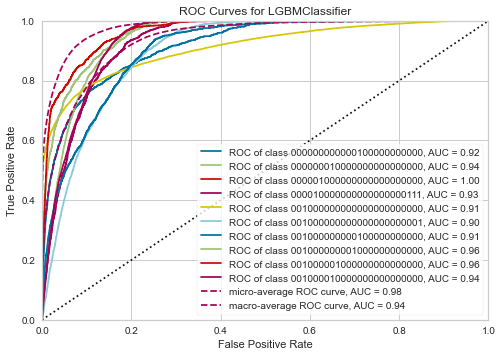

In [9]:
plot_model(lgbm,"auc")

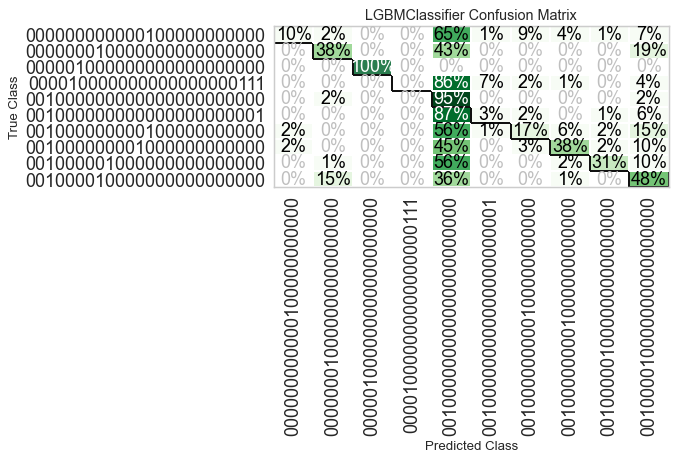

In [10]:
plot_model(lgbm,"confusion_matrix",scale=1.2,plot_kwargs={'percent':True})

In [11]:
%%time
#also tunning random forest model 
rf=tune_model(top_models2[1],choose_better=True)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7557,0.8986,0.2976,0.6579,0.6877,0.3478,0.3817
1,0.7510,0.8958,0.2970,0.6531,0.6837,0.3391,0.3704
2,0.7563,0.8977,0.2990,0.6613,0.6883,0.3504,0.3841
3,0.7547,0.8945,0.2939,0.6556,0.6863,0.3457,0.3792
4,0.7535,0.8964,0.2965,0.6557,0.6857,0.3432,0.3760
5,0.7541,0.8975,0.2925,0.6580,0.6863,0.3458,0.3784
6,0.7533,0.8974,0.2937,0.6573,0.6852,0.3431,0.3758
7,0.7523,0.8969,0.2939,0.6546,0.6847,0.3421,0.3739
8,0.7530,0.8966,0.2929,0.6559,0.6845,0.3373,0.3718
9,0.7553,0.8957,0.2996,0.6611,0.6871,0.3494,0.3823


CPU times: total: 1h 4min 43s
Wall time: 2h 50min 28s


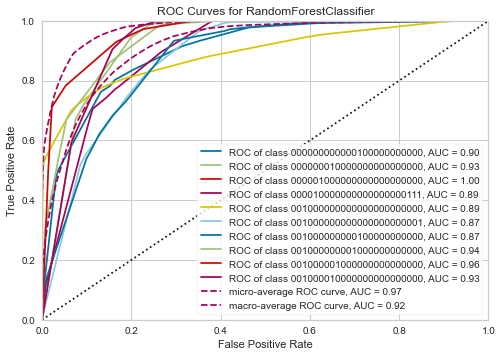

In [12]:
plot_model(rf,"auc")

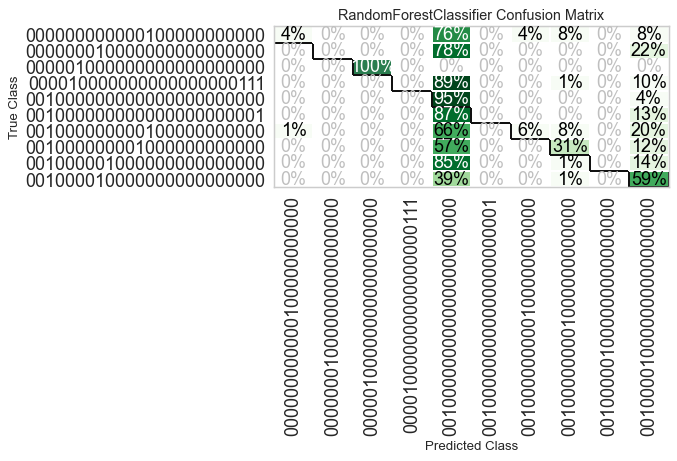

In [13]:
plot_model(rf,"confusion_matrix",scale=1.2,plot_kwargs={'percent':True})

##### ensemble top 2 tuned models

In [14]:
%%time
ensembled_mod1 = ensemble_model(lgbm)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7720,0.9192,0.3846,0.7214,0.7320,0.4323,0.4502
1,0.7709,0.9182,0.3887,0.7232,0.7318,0.4303,0.4477
2,0.7733,0.9197,0.3863,0.7255,0.7330,0.4322,0.4515
3,0.7712,0.9169,0.3864,0.7253,0.7324,0.4314,0.4487
4,0.7718,0.9183,0.3884,0.7263,0.7325,0.4338,0.4510
5,0.7705,0.9185,0.3805,0.7233,0.7309,0.4297,0.4470
6,0.7745,0.9206,0.3835,0.7289,0.7337,0.4367,0.4556
7,0.7682,0.9185,0.3807,0.7209,0.7287,0.4236,0.4408
8,0.7684,0.9176,0.3750,0.7207,0.7278,0.4199,0.4386
9,0.7725,0.9175,0.3805,0.7230,0.7319,0.4309,0.4498


CPU times: total: 49min 35s
Wall time: 38min 14s


###### Ensemble of lgbm does not improves performance a lot even decreases a little.

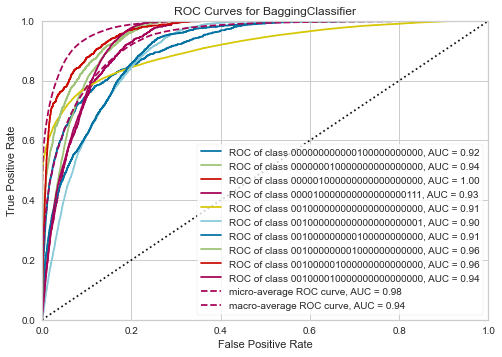

In [15]:
plot_model(ensembled_mod1,"auc")

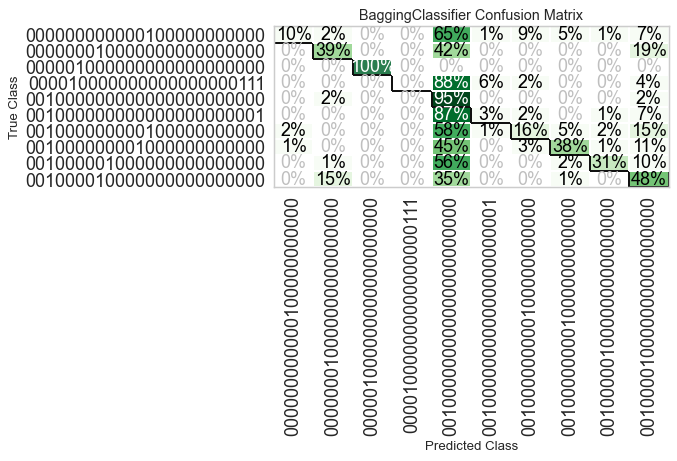

In [16]:
plot_model(ensembled_mod1,"confusion_matrix",scale=1.2,plot_kwargs={'percent':True})

##### blend top 2

In [17]:
%%time
blender = blend_models([lgbm,rf])

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7682,0.9158,0.3545,0.7050,0.7187,0.4100,0.4328
1,0.7645,0.9140,0.3528,0.7519,0.7134,0.3956,0.4199
2,0.7687,0.9161,0.3520,0.7071,0.7181,0.4093,0.4330
3,0.7673,0.9131,0.3549,0.7015,0.7172,0.4080,0.4307
4,0.7668,0.9142,0.3575,0.7046,0.7181,0.4088,0.4306
5,0.7662,0.9150,0.3528,0.7561,0.7170,0.4075,0.4291
6,0.7665,0.9162,0.3486,0.7014,0.7155,0.4031,0.4267
7,0.7639,0.9147,0.3481,0.7019,0.7140,0.4005,0.4223
8,0.7637,0.9141,0.3481,0.7005,0.7139,0.3977,0.4201
9,0.7670,0.9139,0.3509,0.7044,0.7153,0.4018,0.4266


CPU times: total: 2.55 s
Wall time: 57min 43s


###### Blending also does not helps. It even gives a worse performance.

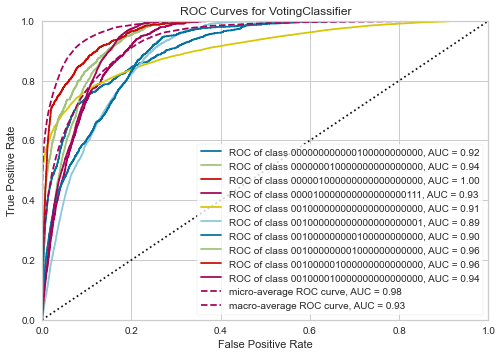

In [18]:
plot_model(blender,"auc")

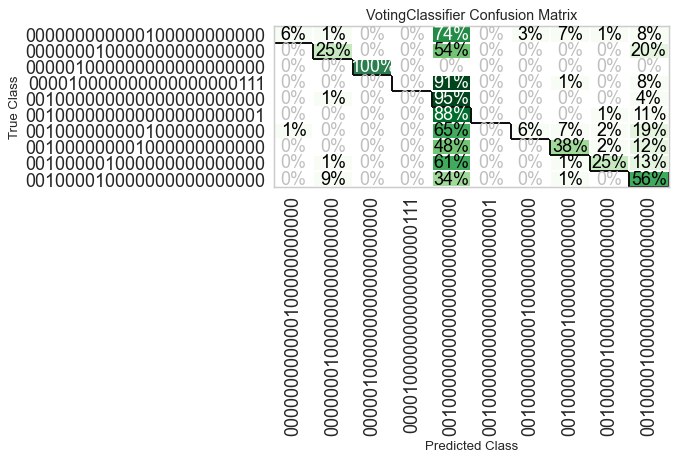

In [19]:
plot_model(blender,"confusion_matrix",scale=1.2,plot_kwargs={'percent':True})

#### Stacking top two tuned models

In [20]:
%%time
stack=stack_models([rf,lgbm])

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
1,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
2,0.7716,0.9191,0.3910,0.7260,0.7363,0.4394,0.4542
3,0.7714,0.9164,0.3978,0.7313,0.7376,0.4419,0.4557
4,0.7711,0.9179,0.3990,0.7327,0.7371,0.4430,0.4562
5,0.7700,0.9183,0.3949,0.7353,0.7365,0.4409,0.4538
6,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
7,0.7682,0.9177,0.3955,0.7270,0.7344,0.4350,0.4483
8,0.7696,0.9174,0.3885,0.7240,0.7339,0.4316,0.4471
9,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000


CPU times: total: 58min 41s
Wall time: 5h 9min 25s


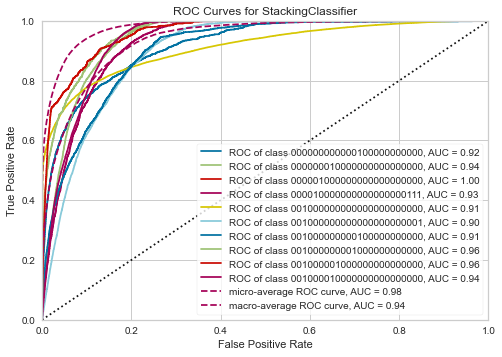

In [21]:
plot_model(stack,"auc")

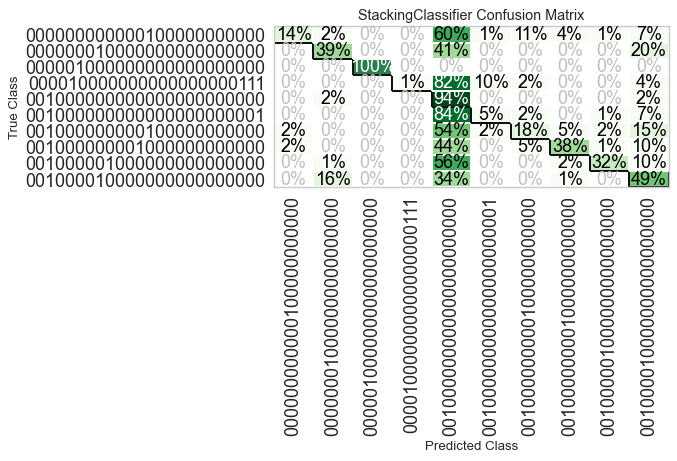

In [22]:
plot_model(stack,"confusion_matrix",scale=1.2,plot_kwargs={'percent':True})

In [23]:
# selecting best model
best_model=automl(optimize='Accuracy')
print(best_model)

LGBMClassifier(bagging_fraction=0.6, bagging_freq=4, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=0.9,
               importance_type='split', learning_rate=0.05, max_depth=-1,
               min_child_samples=96, min_child_weight=0.001, min_split_gain=0.7,
               n_estimators=180, n_jobs=-1, num_leaves=10, objective=None,
               random_state=123, reg_alpha=0.0001, reg_lambda=0.1,
               silent='warn', subsample=1.0, subsample_for_bin=200000,
               subsample_freq=0)


In [24]:
from pycaret.classification import *
best_model=finalize_model(best_model)
save_model(best_model,"FM")

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=['ind_nuevo',
                                                             'indrel',
                                                             'indrel_1mes',
                                                             'tiprel_1mes',
                                                             'tipodom',
                                                             'ind_actividad_cliente'],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=['age', 'antiguedad'],
                                       target='labels', time_features=[])),
                 ('imputer',
                  Simple_Imputer(cate...
                                 colsample_bytree=1.0, feature_fr

##### Hence we are going to use LGBM as our final model as it takes less time to train and predict.

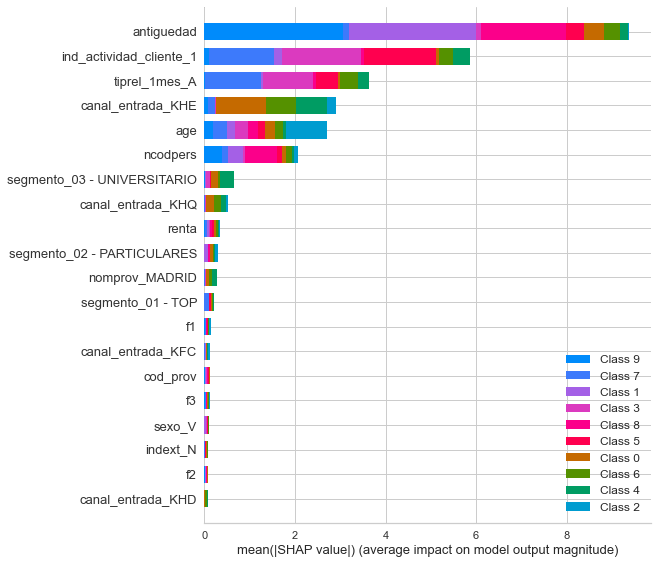

In [25]:
interpret_model(best_model)

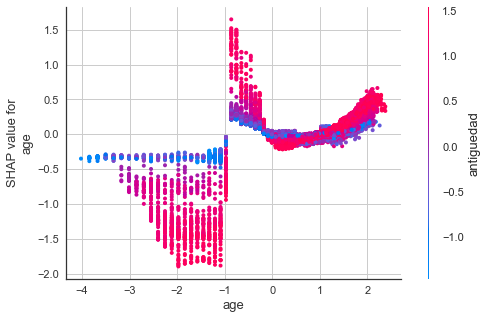

In [28]:
interpret_model(best_model,plot="correlation",feature="age")